## Setting

In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(ComplexHeatmap))
suppressPackageStartupMessages(library(circlize))
suppressPackageStartupMessages(library(grid))
suppressPackageStartupMessages(library(gridtext))

## Fig1-d. KRAS VAF distribution in the cohort colored by KRAS hotspot amino acid change. 

In [2]:
# d_df <- read_excel("table_s1.xlsx", sheet = "Molecular_phenotype_data",
#                 ) %>% select(case_id, KRAS_VAF)
# Read tsv
d_df <- read.table("data/1d-caseid_variant_vaf.tsv", sep = "\t", header = TRUE, stringsAsFactors = FALSE)
d_df$KRAS_VAF <- as.numeric(ifelse(d_df$KRAS_VAF == "NA", NA, d_df$KRAS_VAF))

## Exceptions : they had high mutation burden (n > 25), high CNV (index > 1), and/or additional driver events in TP53, CDKN2A, and SMAD4

d_df <- d_df %>%
  mutate(
    # Set Tumor_Cellularity based on KRAS_VAF
    Tumor_Cellularity = ifelse(KRAS_VAF >= 0.075, "Sufficient", "Low"),
    # Override Tumor_Cellularity for specific case_ids
    Tumor_Cellularity = ifelse(case_id %in% c("C3N-00198", "C3N-01380", "C3N-01715", "C3N-03426"),
                               "Sufficient", Tumor_Cellularity),
    Tumor_Cellularity = ifelse(case_id %in% c("C3N-01012"),
                               "Low", Tumor_Cellularity),
    # Replace NA in KRAS_VAF with 0
    KRAS_VAF = ifelse(is.na(KRAS_VAF), 0, KRAS_VAF)
  ) %>%
  arrange(desc(KRAS_VAF))

#MAKE color column based on mutation
d_df$Color <- "white"
d_df$Color[d_df$mutation=="G12C"] <- "#369645"
d_df$Color[d_df$mutation=="G12D"] <- "#3470B2"
d_df$Color[d_df$mutation=="G12S"] <- "#1FA7C1"
d_df$Color[d_df$mutation=="G12R"] <- "#D7CA47"
d_df$Color[d_df$mutation=="G12V"] <- "#5FBE96"
d_df$Color[d_df$mutation=="G13D"] <- "#CE4127"
d_df$Color[d_df$mutation=="Q61H"] <- "#DE7D43"
d_df$Color[d_df$mutation=="Q61R"] <- "#5FB75E"


tail(d_df,30)
# summary(d_df)

,case_id,mutation,KRAS_VAF,Tumor_Cellularity,Color
,<chr>,<chr>,<dbl>,<chr>,<chr>
111,C3N-01382,G12V,0.0554622,Low,#5FBE96
112,C3N-01166,G12V,0.0533333,Low,#5FBE96
113,C3N-00513,G12D,0.0532446,Low,#3470B2
114,C3N-00303,G12D,0.0512091,Low,#3470B2
115,C3L-03395,G12D,0.0510441,Low,#3470B2
116,C3N-04284,Q61R,0.0478261,Low,#5FB75E
117,C3L-04495,G12D,0.0471698,Low,#3470B2
118,C3N-03440,G12V,0.0470852,Low,#5FBE96
119,C3N-00517,G12D,0.0461538,Low,#3470B2


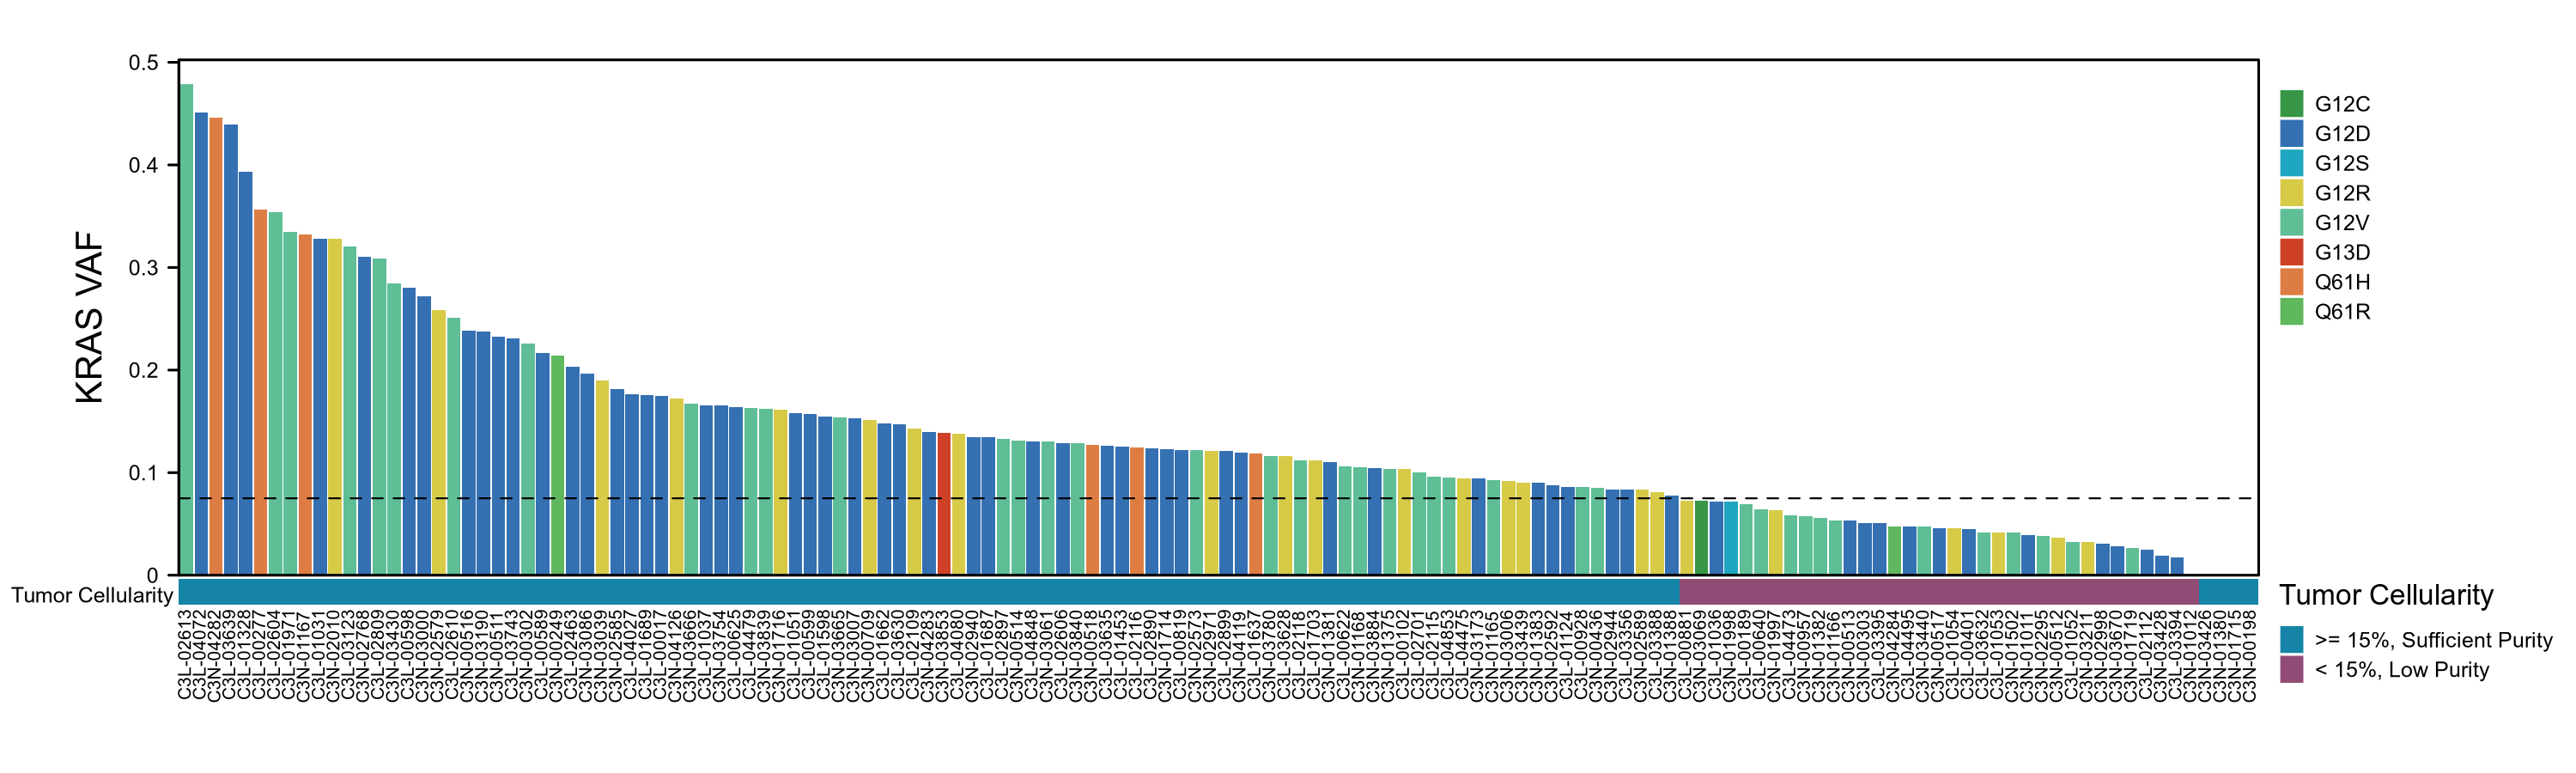

In [3]:
options(repr.plot.width=10, repr.plot.height=3, repr.plot.res = 300)
# png("plot/fig1d.png", width = 10, height = 3, res = 300, units = "in")

zero_mat <- matrix(nrow = 0, ncol = nrow(d_df))

d_ano <- HeatmapAnnotation( 
        prop = anno_barplot( 
            d_df$KRAS_VAF, height = unit(1.7, "in"), width = unit(8, "in"),
            bar_width = 0.9, border = TRUE, 
            # Color by mutation
            gp = gpar(lwd = 0, fill = d_df$Color), 
            axis = TRUE, axis_param = list(at = seq(0, 0.5, by = 0.1), labels = seq(0, 0.5, by = 0.1), gp = gpar(fontsize = 6))
        ),
        tumor_cellularity = d_df$Tumor_Cellularity,
        
        col = list(tumor_cellularity = c("Low" = "#914C75", "Sufficient" = "#1584A7")),
        annotation_height = unit(c(2, 0.1), "in"),
        show_annotation_name = c(FALSE, FALSE),
        show_legend = c(FALSE, FALSE)

    ) 

d_ht <- Heatmap(
        zero_mat, top_annotation = d_ano, 
        column_labels = gt_render(
            d_df$case_id, padding = unit(c(0, -5, 0, 0), "pt")),
        # cluster_columns = TRUE, column_gap = unit(1, "in"),
        column_names_gp = gpar(fontsize = 5)
    )

d_legend <- packLegend(
    Legend(labels = c("G12C", "G12D", "G12S", "G12R", "G12V", "G13D", "Q61H", "Q61R"),
           labels_gp = gpar(fontsize = 6),
           legend_gp = gpar(fill = c("#369645", "#3470B2", "#1FA7C1", "#D7CA47", "#5FBE96", "#CE4127", "#DE7D43", "#5FB75E")),
           grid_height = unit(0.1, "in"), grid_width = unit(0.1, "in"),
    ),
    Legend(
        labels = c(">= 15%, Sufficient Purity", "< 15%, Low Purity"),
        labels_gp = gpar(fontsize = 6),
        legend_gp = gpar(fill = c("#1584A7", "#914C75")),
        grid_height = unit(0.1, "in"), grid_width = unit(0.1, "in"),
        title = "Tumor Cellularity",
        title_gp = gpar(fontsize = 8),
        title_position = "topleft"
    ),
    row_gap = unit(1, "in")
)

draw(d_ht, 
    padding = unit(c(0, 0.5, 0, 0.1), "in"),
    annotation_legend_list = d_legend
)


decorate_annotation(
    "prop", {
        grid.text(
            "KRAS VAF", unit(-1, "in" ), rot = 90, vjust = 7, hjust = 0.5,
            gp = gpar(fontsize = 10)
        )
        grid.lines(c(0,1), unit(c(0.075, 0.075), "native"), gp = gpar(col = "black", lwd = 0.7, lty = 2))
    }
)

decorate_annotation(
    "tumor_cellularity", {
        grid.text(
            "Tumor Cellularity", unit(-1, "in"), rot = 0, vjust = 0.7, hjust = -0.55,
            gp = gpar(fontsize = 6)
        )
    }
)

# dev.off()